Mean: 73.12 
Standar Deviasi: 9.00 
Varians: 81.08 
Sigma ±1 Std Dev : 64.12%, 82.13%
Sigma ±2 Std Dev : 55.12%, 91.13%
Sigma ±3 Std Dev : 46.11%, 100.14%


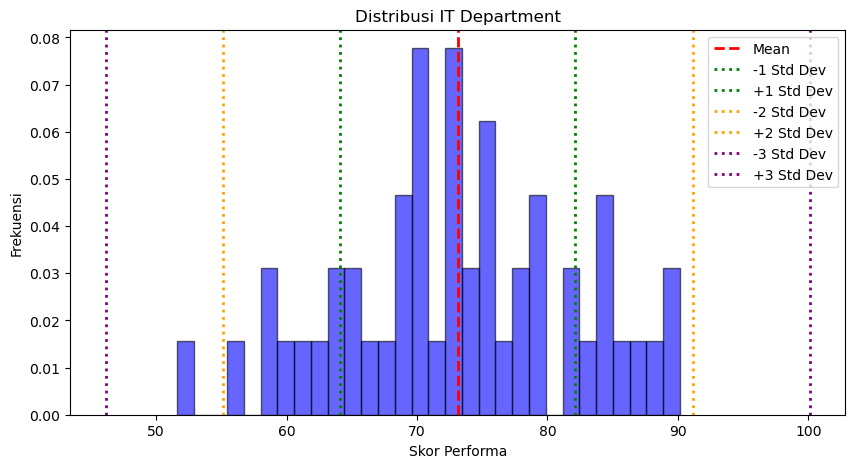

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(seed=0)
it_scores = np.random.normal(loc=72, scale=8, size=50)

df = pd.DataFrame({
    'IT Department' : ['IT'] * 50,
    'IT Skor Performa' : np.concatenate([it_scores])
})

mean_value = np.mean(it_scores)
std_value = np.std(it_scores)
var_value = np.var(it_scores)

print(f"Mean: {mean_value:.2f} ")
print(f"Standar Deviasi: {std_value:.2f} ")
print(f"Varians: {var_value:.2f} ")

bound_1sigma = mean_value - std_value, mean_value + std_value
bound_2sigma = mean_value - 2*std_value, mean_value + 2*std_value
bound_3sigma = mean_value - 3*std_value, mean_value + 3*std_value

print(f"Sigma ±1 Std Dev : {bound_1sigma[0]:.2f}%, {bound_1sigma[1]:.2f}%")
print(f"Sigma ±2 Std Dev : {bound_2sigma[0]:.2f}%, {bound_2sigma[1]:.2f}%")
print(f"Sigma ±3 Std Dev : {bound_3sigma[0]:.2f}%, {bound_3sigma[1]:.2f}%")

# Hitung persentase masing-masing rentang
within_1sigma = np.sum((it_scores >= bound_1sigma[0]) & (it_scores <= bound_1sigma[0])) / len(it_scores) * 100
within_2sigma = np.sum((it_scores >= bound_2sigma[0]) & (it_scores <= bound_2sigma[0])) / len(it_scores) * 100
within_3sigma = np.sum((it_scores >= bound_3sigma[0]) & (it_scores <= bound_3sigma[0])) / len(it_scores) * 100

# Visualisasi Histogram
plt.figure(figsize=(10, 5))
plt.hist(it_scores, bins=30, alpha=0.6, color='blue', edgecolor='black', density=True)

# Tambahkan garis Mean dan Standar Deviasi
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(bound_1sigma[0], color='green', linestyle='dotted', linewidth=2, label="-1 Std Dev")
plt.axvline(bound_1sigma[1], color='green', linestyle='dotted', linewidth=2, label="+1 Std Dev")
plt.axvline(bound_2sigma[0], color='orange', linestyle='dotted', linewidth=2, label="-2 Std Dev")
plt.axvline(bound_2sigma[1], color='orange', linestyle='dotted', linewidth=2, label="+2 Std Dev")
plt.axvline(bound_3sigma[0], color='purple', linestyle='dotted', linewidth=2, label="-3 Std Dev")
plt.axvline(bound_3sigma[1], color='purple', linestyle='dotted', linewidth=2, label="+3 Std Dev")

plt.legend()
plt.title("Distribusi IT Department")
plt.xlabel("Skor Performa")
plt.ylabel("Frekuensi")
plt.show()

In [3]:
from scipy.stats import skew
print(f"Skewness Sales: {skew(df[df['IT Department'] == 'IT']['IT Skor Performa']):.2f}")

Skewness Sales: -0.13


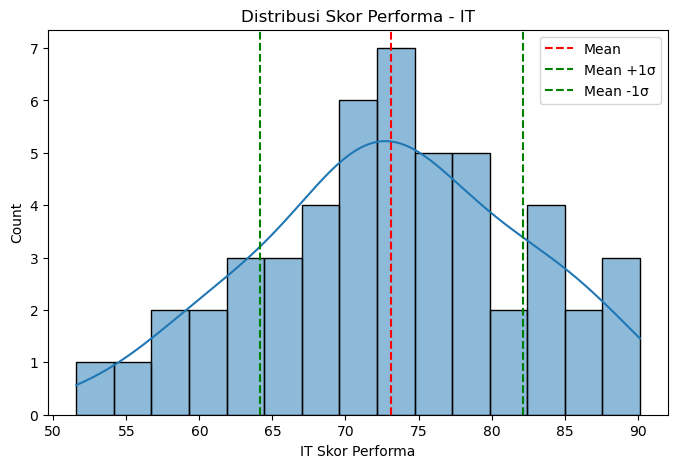

In [6]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df[df['IT Department'] == 'IT']['IT Skor Performa'], bins=15, kde=True)
plt.axvline(mean_value, color='red', linestyle='dashed', label="Mean")
plt.axvline(mean_value + std_value, color='green', linestyle='dashed', label="Mean +1σ")
plt.axvline(mean_value - std_value, color='green', linestyle='dashed', label="Mean -1σ")
plt.legend()
plt.title("Distribusi Skor Performa - IT")
plt.show()